In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

def func_time(x):
    x = datetime.strptime(x,'%m/%d/%Y')
    x = datetime.strftime(x,'%Y-%m-%d')
    return x

def func_year(x):
    return int(x[:4])

def func_month(x):
    return int(x[5:7])

def func_week(x):
    return datetime.strptime(x,'%Y-%m-%d').weekday()

def func_day(x):
    return int(x[8:10])

df = pd.read_csv('Origin_02.csv')
df = df.iloc[:,1:]

# 
df['date'] = df['Date Local'].apply(func_time)
# month
df['year'] = df['date'].apply(func_year)
# date
df['month'] = df['date'].apply(func_month)
# Week
df['weekday'] = df['date'].apply(func_week)
# Day
df['day'] = df['date'].apply(func_day)

In [2]:
pollutant_keys = ['NO2','O3','SO2','CO']
pollutant_vals = [' Full Mean (standard)',' Full 1st Max Value (standard)',' Full 1st Max Hour (standard)']
all_indicators = []
for x1 in pollutant_keys:
    for x2 in pollutant_vals:
        all_indicators.append(x1+x2)

In [3]:
# about the same state and date, we average the date(ignore"city")
# reason：Missing value of each city is different across time, our model's label is State, to an extent, this way can 
# offset the issue that we have missing data in the middle. 

identifier = ['State','date']
time_feature = ['year','month','weekday','day']
df = df.groupby(identifier).mean().reset_index()

# simplify dataframe
df = df[identifier + time_feature + all_indicators]
df

,State,date,year,month,weekday,day,NO2 Full Mean (standard),NO2 Full 1st Max Value (standard),NO2 Full 1st Max Hour (standard),O3 Full Mean (standard),O3 Full 1st Max Value (standard),O3 Full 1st Max Hour (standard),SO2 Full Mean (standard),SO2 Full 1st Max Value (standard),SO2 Full 1st Max Hour (standard),CO Full Mean (standard),CO Full 1st Max Value (standard),CO Full 1st Max Hour (standard)
0,District Of Columbia,2000-01-01,2000.0,1.0,5.0,1.0,26.541667,39.0,17.0,0.004167,0.014,23.0,11.237500,26.00,16.0,2.033882,3.85,4.0
1,District Of Columbia,2000-01-02,2000.0,1.0,6.0,2.0,14.958333,22.0,0.0,0.023083,0.029,11.0,7.777083,11.00,1.0,0.770833,2.35,1.5
2,District Of Columbia,2000-01-03,2000.0,1.0,0.0,3.0,18.291667,32.0,17.0,0.014875,0.026,20.0,7.116149,10.30,12.5,0.583333,1.65,18.0
3,District Of Columbia,2000-01-04,2000.0,1.0,1.0,4.0,13.363636,25.0,18.0,0.017250,0.024,0.0,5.402083,9.30,21.0,0.508333,0.85,8.0
4,District Of Columbia,2000-01-05,2000.0,1.0,2.0,5.0,16.625000,33.0,21.0,0.009583,0.025,3.0,8.362500,11.50,11.0,0.616667,1.45,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7109,Virginia,2009-10-27,2009.0,10.0,1.0,27.0,19.083333,26.0,11.0,0.003875,0.013,0.0,0.493750,3.15,9.5,0.395834,0.65,17.0
7110,Virginia,2009-10-28,2009.0,10.0,2.0,28.0,13.136364,19.0,4.0,0.014944,0.019,13.0,0.000000,0.00,1.0,0.346286,0.50,3.0
7111,Virginia,2009-10-29,2009.0,10.0,3.0,29.0,12.000000,20.0,5.0,0.011667,0.021,23.0,1.118750,5.00,8.5,0.277083,0.35,9.0
7112,Virginia,2009-10-30,2009.0,10.0,4.0,30.0,6.666667,11.0,17.0,0.024000,0.026,8.0,0.908334,4.00,13.5,0.272917,0.35,8.5


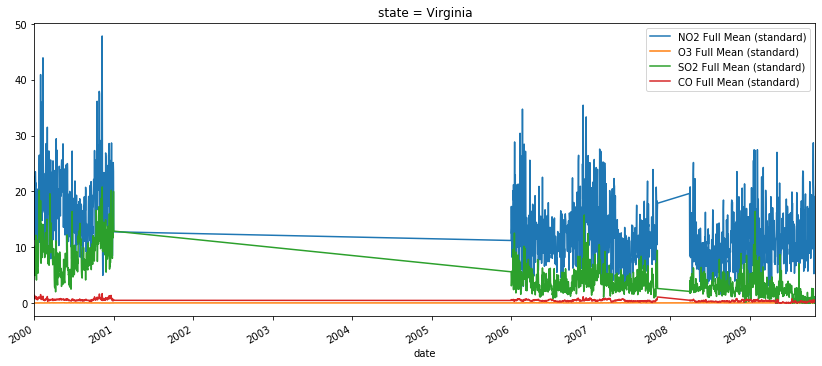

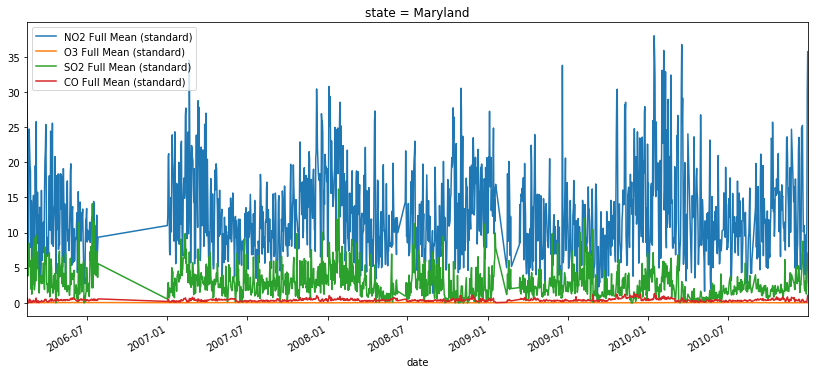

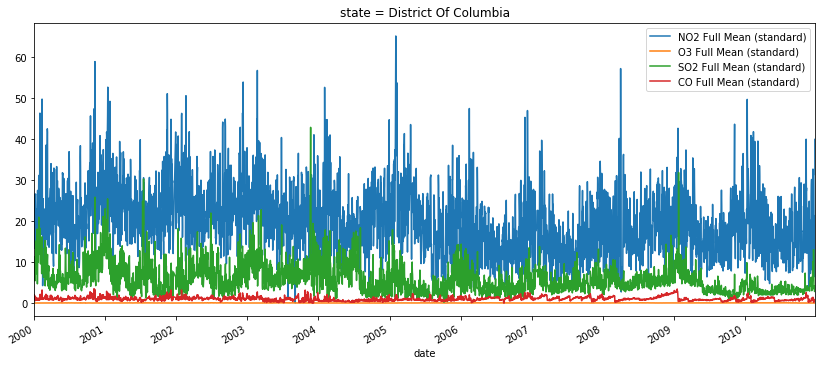

In [7]:
import matplotlib.pyplot as plt


def plot_test(dd,state):
    dd = df[df['State'] == state].reset_index(drop=True)
    dd = dd.drop(time_feature,axis=1)
    dd.index  = dd['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
    dd[[x+pollutant_vals[0] for x in pollutant_keys]].plot(title='state = '+state, figsize=(14,6))
    plt.show()
    
all_states = list(set(list(df['State'])))
for state in all_states: 
    plot_test(df,state)

In [8]:
# Further analyze the difference between three state
# first choose the intersection of state and time

cols = [x+pollutant_vals[0] for x in pollutant_keys]
dff0 = df[df['State'] == all_states[0]][['date'] + cols]
dff0.columns = ['date'] + [all_states[0] +' '+x for x in cols]
dff1 = df[df['State'] == all_states[1]][['date'] + cols]
dff1.columns = ['date'] + [all_states[1] +' '+x for x in cols]
dff2 = df[df['State'] == all_states[2]][['date'] + cols]
dff2.columns = ['date'] + [all_states[2] +' '+x for x in cols]

dff = pd.merge(dff0,dff1,how='outer',on=['date','date'])
dff = pd.merge(dff,dff2,how='outer',on=['date','date'])
dff = dff.dropna().reset_index(drop=True)
dff.head()

,date,Virginia NO2 Full Mean (standard),Virginia O3 Full Mean (standard),Virginia SO2 Full Mean (standard),Virginia CO Full Mean (standard),Maryland NO2 Full Mean (standard),Maryland O3 Full Mean (standard),Maryland SO2 Full Mean (standard),Maryland CO Full Mean (standard),District Of Columbia NO2 Full Mean (standard),District Of Columbia O3 Full Mean (standard),District Of Columbia SO2 Full Mean (standard),District Of Columbia CO Full Mean (standard)
0,2006-02-15,26.354167,0.013041,3.425000,0.597917,30.166667,0.006417,8.658333,0.659091,47.500000,0.011542,6.987500,2.000000
1,2006-02-16,19.333333,0.032896,2.504167,0.561458,24.521739,0.023917,7.691667,0.714584,35.217391,0.033042,5.454348,1.672916
2,2006-02-17,6.185606,0.032959,2.609375,0.406250,6.913043,0.030667,3.822916,0.000000,7.833333,0.034625,3.618750,0.693750
3,2006-02-18,5.937500,0.028458,5.622917,0.336458,6.086957,0.029417,5.225000,0.000000,8.291667,0.031708,7.493750,0.700000
4,2006-02-19,7.958334,0.023729,5.135416,0.395833,9.869565,0.020458,6.112500,0.022916,11.958333,0.026583,8.106250,0.722916


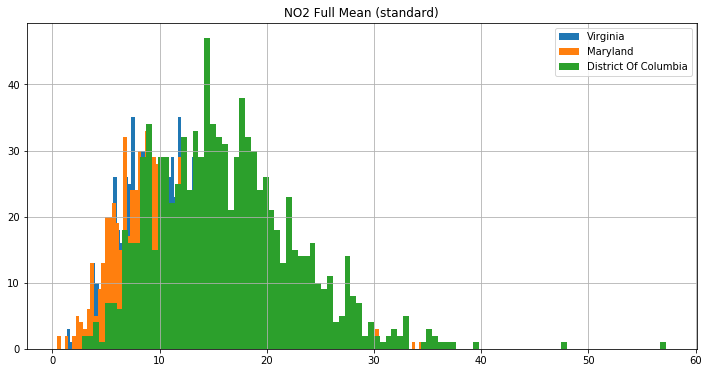

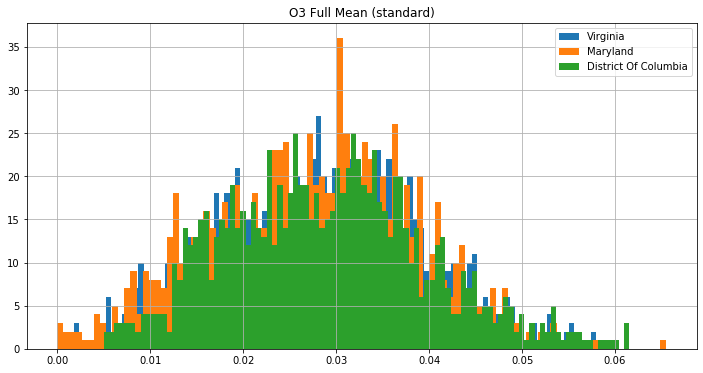

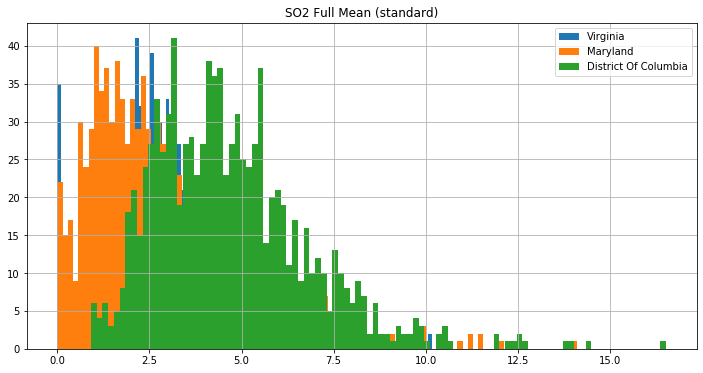

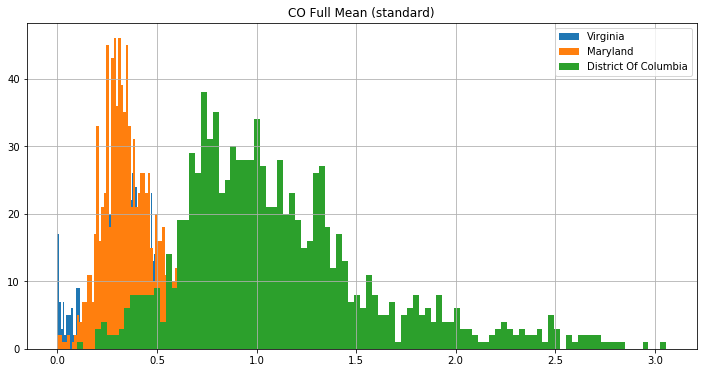

In [6]:
import matplotlib.pyplot as plt

# Only the time intersection data is taken, so the total data volume of the three regions is the same, 
# and the distribution map below tells us that their distribution is different

dd = dff.copy()
for k  in pollutant_keys:
    key = k + pollutant_vals[0]
    plt.figure(figsize=(12,6))
    plt.title(key)
    dd[all_states[0]+' '+key].hist(bins=100)
    dd[all_states[1]+' '+key].hist(bins=100)
    dd[all_states[2]+' '+key].hist(bins=100)
    plt.legend([x for x in all_states])
    plt.show()

In [9]:
df_DC

,State,date,year,month,weekday,day,NO2 Full Mean (standard),NO2 Full 1st Max Value (standard),NO2 Full 1st Max Hour (standard),O3 Full Mean (standard),O3 Full 1st Max Value (standard),O3 Full 1st Max Hour (standard),SO2 Full Mean (standard),SO2 Full 1st Max Value (standard),SO2 Full 1st Max Hour (standard),CO Full Mean (standard),CO Full 1st Max Value (standard),CO Full 1st Max Hour (standard)
0,District Of Columbia,2000-01-01,2000.0,1.0,5.0,1.0,26.541667,39.0,17.0,0.004167,0.014,23.0,11.237500,26.00,16.0,2.033882,3.85,4.0
1,District Of Columbia,2000-01-02,2000.0,1.0,6.0,2.0,14.958333,22.0,0.0,0.023083,0.029,11.0,7.777083,11.00,1.0,0.770833,2.35,1.5
2,District Of Columbia,2000-01-03,2000.0,1.0,0.0,3.0,18.291667,32.0,17.0,0.014875,0.026,20.0,7.116149,10.30,12.5,0.583333,1.65,18.0
3,District Of Columbia,2000-01-04,2000.0,1.0,1.0,4.0,13.363636,25.0,18.0,0.017250,0.024,0.0,5.402083,9.30,21.0,0.508333,0.85,8.0
4,District Of Columbia,2000-01-05,2000.0,1.0,2.0,5.0,16.625000,33.0,21.0,0.009583,0.025,3.0,8.362500,11.50,11.0,0.616667,1.45,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7109,Virginia,2009-10-27,2009.0,10.0,1.0,27.0,19.083333,26.0,11.0,0.003875,0.013,0.0,0.493750,3.15,9.5,0.395834,0.65,17.0
7110,Virginia,2009-10-28,2009.0,10.0,2.0,28.0,13.136364,19.0,4.0,0.014944,0.019,13.0,0.000000,0.00,1.0,0.346286,0.50,3.0
7111,Virginia,2009-10-29,2009.0,10.0,3.0,29.0,12.000000,20.0,5.0,0.011667,0.021,23.0,1.118750,5.00,8.5,0.277083,0.35,9.0
7112,Virginia,2009-10-30,2009.0,10.0,4.0,30.0,6.666667,11.0,17.0,0.024000,0.026,8.0,0.908334,4.00,13.5,0.272917,0.35,8.5


In [28]:
# checking missing value
df.isnull().any()

State                                False
City                                 False
date                                 False
year                                 False
month                                False
weekday                              False
day                                  False
NO2 Full Mean (standard)             False
NO2 Full 1st Max Value (standard)    False
NO2 Full 1st Max Hour (standard)     False
O3 Full Mean (standard)              False
O3 Full 1st Max Value (standard)     False
O3 Full 1st Max Hour (standard)      False
SO2 Full Mean (standard)             False
SO2 Full 1st Max Value (standard)    False
SO2 Full 1st Max Hour (standard)     False
CO Full Mean (standard)              False
CO Full 1st Max Value (standard)     False
CO Full 1st Max Hour (standard)      False
dtype: bool

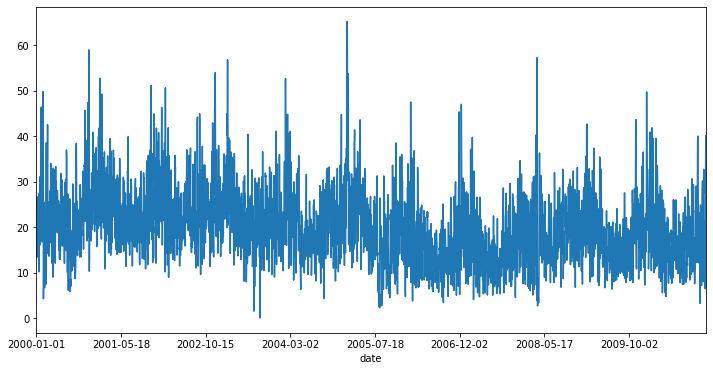

In [27]:
dd.index = dd['date']
dd['NO2 Full Mean (standard)'].plot(figsize=(12,6))

In [20]:
dd['City'].value_counts()

Washington       15814
Essex             5964
McLean            5604
Not in a city     5530
Annandale         4042
Alexandria        3664
Beltsville        1830
Seven Corners     1446
Name: City, dtype: int64

In [170]:
state_name = 'District Of Columbia'
dff = df[df['State'] == state_name].copy()
dff = dff[dff['City'] == 'Washington']
#dff = dff.drop_duplicates(subset=['Date Local'])
#dff.index = dff['Date Local']

In [171]:
dff.groupby(['month']).mean()[[x+pollutant_vals[0] for x in pollutant_keys]]

,NO2 Full Mean (standard),O3 Full Mean (standard),SO2 Full Mean (standard),CO Full Mean (standard)
month,,,,
1,22.650550,0.013903,7.962447,1.164410
2,24.293297,0.017288,7.098003,1.064326
3,21.844342,0.023202,6.310007,0.921287
4,20.532440,0.026426,5.431170,0.928061
5,17.936433,0.028934,5.028683,0.933233
6,17.936288,0.033428,5.508741,0.863305
7,16.864016,0.034380,5.693829,0.887087
8,17.430429,0.032832,5.008409,0.902113
9,18.093001,0.024269,4.148535,0.933551


In [172]:
dff.groupby(['weekday']).mean()[[x+pollutant_vals[0] for x in pollutant_keys]]

,NO2 Full Mean (standard),O3 Full Mean (standard),SO2 Full Mean (standard),CO Full Mean (standard)
weekday,,,,
0,20.658065,0.022855,5.717242,1.025311
1,21.489853,0.023224,6.037966,1.011969
2,21.466690,0.022724,6.055267,0.985004
3,21.592257,0.022705,6.067399,1.008108
4,21.086766,0.022589,5.963873,0.996952
5,18.405440,0.024087,5.500403,1.007177
6,16.249263,0.025075,5.246519,0.991144


In [173]:
dff.groupby(['year']).mean()[[x+pollutant_vals[0] for x in pollutant_keys]]

,NO2 Full Mean (standard),O3 Full Mean (standard),SO2 Full Mean (standard),CO Full Mean (standard)
year,,,,
2000,22.725717,0.017567,8.137540,1.175696
2001,24.474311,0.020936,6.651349,1.075424
2002,24.441036,0.024150,6.712709,1.158795
2003,22.640754,0.019372,8.323187,0.896370
2004,20.956404,0.019498,6.475045,0.617589
2005,20.836788,0.021644,4.483953,0.848892
2006,15.966560,0.026704,4.525003,1.115848
2007,15.332144,0.028556,5.021016,1.196905
2008,18.057799,0.026468,5.556448,1.221562


In [175]:
dff

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Full Mean (standard),NO2 Full 1st Max Value (standard),...,SO2 Full Mean (standard),SO2 Full 1st Max Value (standard),SO2 Full 1st Max Hour (standard),CO Full Mean (standard),CO Full 1st Max Value (standard),CO Full 1st Max Hour (standard),date,year,month,weekday
0,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,1/1/2000,26.541667,39,...,11.250000,33.0,15,2.062500,4.1,3,2000-01-01,2000,1,5
1,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,1/1/2000,26.541667,39,...,11.250000,33.0,15,2.005263,3.6,5,2000-01-01,2000,1,5
2,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,1/1/2000,26.541667,39,...,11.225000,19.0,17,2.062500,4.1,3,2000-01-01,2000,1,5
3,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,1/1/2000,26.541667,39,...,11.225000,19.0,17,2.005263,3.6,5,2000-01-01,2000,1,5
4,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,1/2/2000,14.958333,22,...,7.791667,11.0,0,0.658333,2.6,1,2000-01-02,2000,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42511,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,12/30/2010,40.083333,82,...,3.062500,4.6,14,0.970833,1.0,0,2010-12-30,2010,12,3
42512,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,12/31/2010,31.391304,44,...,3.086957,4.0,10,1.000000,1.1,6,2010-12-31,2010,12,4
42513,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,12/31/2010,31.391304,44,...,3.086957,4.0,10,1.012500,1.1,11,2010-12-31,2010,12,4
42514,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,12/31/2010,31.391304,44,...,3.071429,3.6,11,1.000000,1.1,6,2010-12-31,2010,12,4


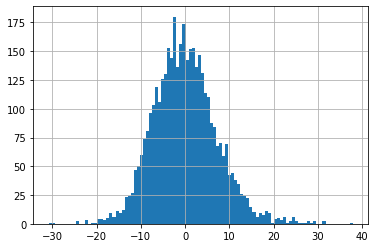

In [167]:
indicator = pollutant_keys[0] + pollutant_vals[0]

# today minus average of last 30 days before today
(dff[indicator] - dff[indicator].rolling(10).mean().shift(1)).hist(bins=100)

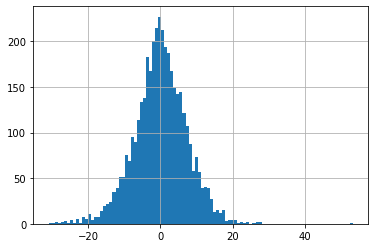

In [168]:
# today minus yesterday
(dff[indicator] - dff[indicator].shift(1)).hist(bins=100)

In [128]:
dff.shift(-1)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Full Mean (standard),NO2 Full 1st Max Value (standard),...,SO2 Full Mean (standard),SO2 Full 1st Max Value (standard),SO2 Full 1st Max Hour (standard),CO Full Mean (standard),CO Full 1st Max Value (standard),CO Full 1st Max Hour (standard),date,year,month,weekday
15212,24.0,5.0,3001.0,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/15/2006,30.166667,39.0,...,8.666667,19.0,12.0,0.600000,1.0,23.0,2006-02-15,2006.0,2.0,2.0
15213,24.0,5.0,3001.0,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/15/2006,30.166667,39.0,...,8.650000,13.0,11.0,0.718182,1.8,22.0,2006-02-15,2006.0,2.0,2.0
15214,24.0,5.0,3001.0,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/15/2006,30.166667,39.0,...,8.650000,13.0,11.0,0.600000,1.0,23.0,2006-02-15,2006.0,2.0,2.0
15215,24.0,5.0,3001.0,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/16/2006,24.521739,43.0,...,7.708333,23.0,15.0,0.625000,2.0,7.0,2006-02-16,2006.0,2.0,3.0
15216,24.0,5.0,3001.0,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/16/2006,24.521739,43.0,...,7.708333,23.0,15.0,0.804167,1.5,7.0,2006-02-16,2006.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43889,24.0,5.0,3001.0,600 Dorsey Avenue,Maryland,Baltimore,Essex,12/31/2010,31.083333,39.0,...,7.166667,11.5,9.0,1.012500,1.7,22.0,2010-12-31,2010.0,12.0,4.0
43890,24.0,5.0,3001.0,600 Dorsey Avenue,Maryland,Baltimore,Essex,12/31/2010,31.083333,39.0,...,7.166667,11.5,9.0,0.950000,1.4,6.0,2010-12-31,2010.0,12.0,4.0
43891,24.0,5.0,3001.0,600 Dorsey Avenue,Maryland,Baltimore,Essex,12/31/2010,31.083333,39.0,...,7.137500,10.6,11.0,1.012500,1.7,22.0,2010-12-31,2010.0,12.0,4.0
43892,24.0,5.0,3001.0,600 Dorsey Avenue,Maryland,Baltimore,Essex,12/31/2010,31.083333,39.0,...,7.137500,10.6,11.0,0.950000,1.4,6.0,2010-12-31,2010.0,12.0,4.0


In [129]:
dff

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Full Mean (standard),NO2 Full 1st Max Value (standard),...,SO2 Full Mean (standard),SO2 Full 1st Max Value (standard),SO2 Full 1st Max Hour (standard),CO Full Mean (standard),CO Full 1st Max Value (standard),CO Full 1st Max Hour (standard),date,year,month,weekday
15212,24,5,3001,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/15/2006,30.166667,39,...,8.666667,19.0,12,0.718182,1.8,22,2006-02-15,2006,2,2
15213,24,5,3001,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/15/2006,30.166667,39,...,8.666667,19.0,12,0.600000,1.0,23,2006-02-15,2006,2,2
15214,24,5,3001,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/15/2006,30.166667,39,...,8.650000,13.0,11,0.718182,1.8,22,2006-02-15,2006,2,2
15215,24,5,3001,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/15/2006,30.166667,39,...,8.650000,13.0,11,0.600000,1.0,23,2006-02-15,2006,2,2
15216,24,5,3001,600 Dorsey Avenue,Maryland,Baltimore,Essex,2/16/2006,24.521739,43,...,7.708333,23.0,15,0.625000,2.0,7,2006-02-16,2006,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43889,24,5,3001,600 Dorsey Avenue,Maryland,Baltimore,Essex,12/30/2010,35.750000,51,...,6.887500,11.2,11,1.120833,1.6,8,2010-12-30,2010,12,3
43890,24,5,3001,600 Dorsey Avenue,Maryland,Baltimore,Essex,12/31/2010,31.083333,39,...,7.166667,11.5,9,1.012500,1.7,22,2010-12-31,2010,12,4
43891,24,5,3001,600 Dorsey Avenue,Maryland,Baltimore,Essex,12/31/2010,31.083333,39,...,7.166667,11.5,9,0.950000,1.4,6,2010-12-31,2010,12,4
43892,24,5,3001,600 Dorsey Avenue,Maryland,Baltimore,Essex,12/31/2010,31.083333,39,...,7.137500,10.6,11,1.012500,1.7,22,2010-12-31,2010,12,4


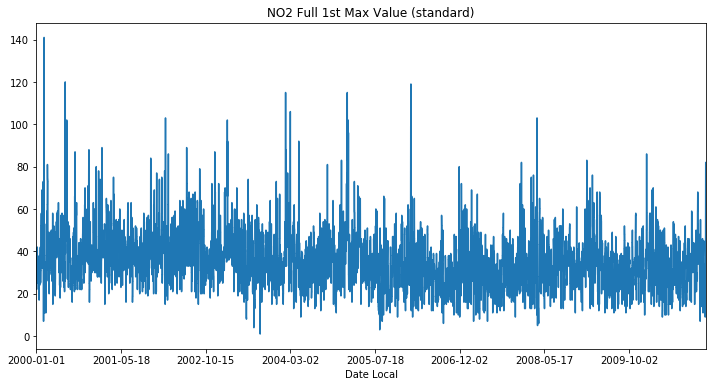

In [66]:
import matplotlib.pyplot as plt

indicator = pollutant_keys[0] + pollutant_vals[1]

dff[indicator].plot(figsize=(12,6),title=indicator)

In [70]:
dff['month'] = dff['Date Local'].apply(lambda x:int(x[5:7]))
dff['month']

D:\ANA37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date Local
2000-01-01     1
2000-01-01     1
2000-01-01     1
2000-01-01     1
2000-01-02     1
              ..
2010-12-30    12
2010-12-31    12
2010-12-31    12
2010-12-31    12
2010-12-31    12
Name: month, Length: 15814, dtype: int64